In [24]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#read in data
df = pd.read_csv(r'C:\Users\xooka\OneDrive\Desktop\Data Projects\movies\movies.csv')


In [2]:
#first look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#check missing data

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
#change col data type
df['budget'] = df['budget'].apply('int64')

df['gross'] = df['gross'].apply('int64')

In [20]:
#data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [7]:
df.drop_duplicates(subset=None, keep="first", inplace=True)

Text(0, 0.5, 'Budget for Film')

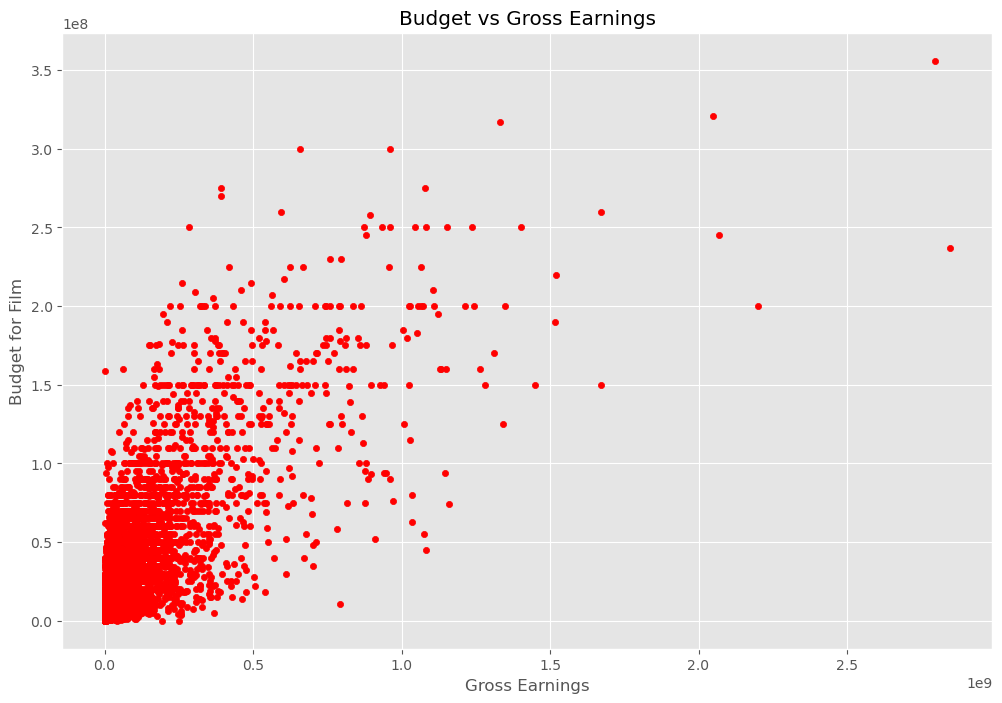

In [25]:
ax1 = df.plot.scatter(x='gross',y='budget', c='red')

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

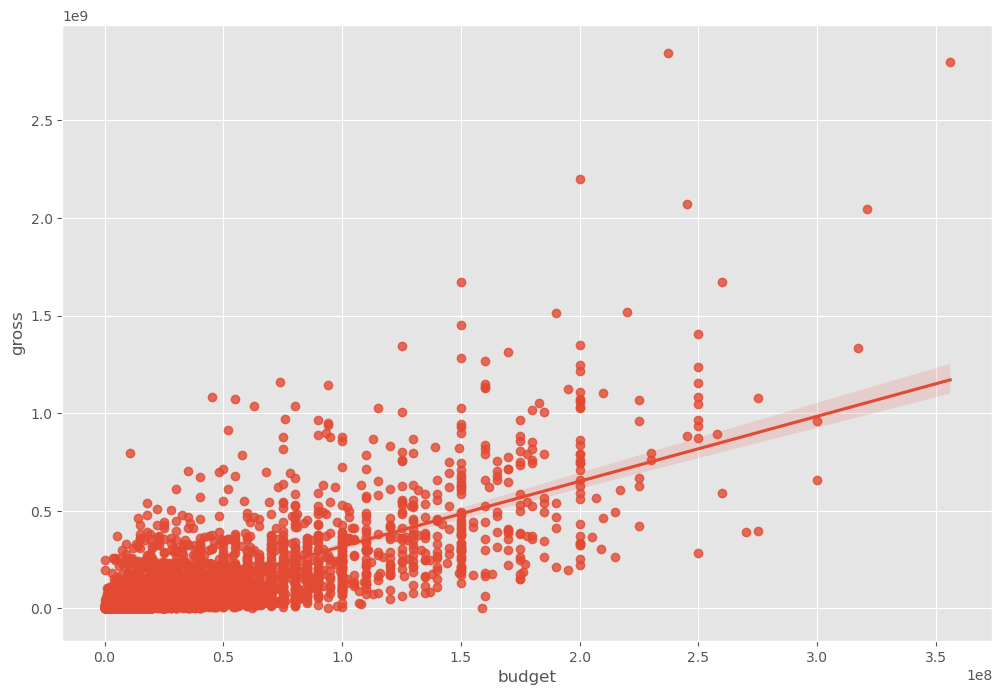

In [31]:
#Plot budget vs gross using Seaborn

sns.regplot(x='budget', y='gross', data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

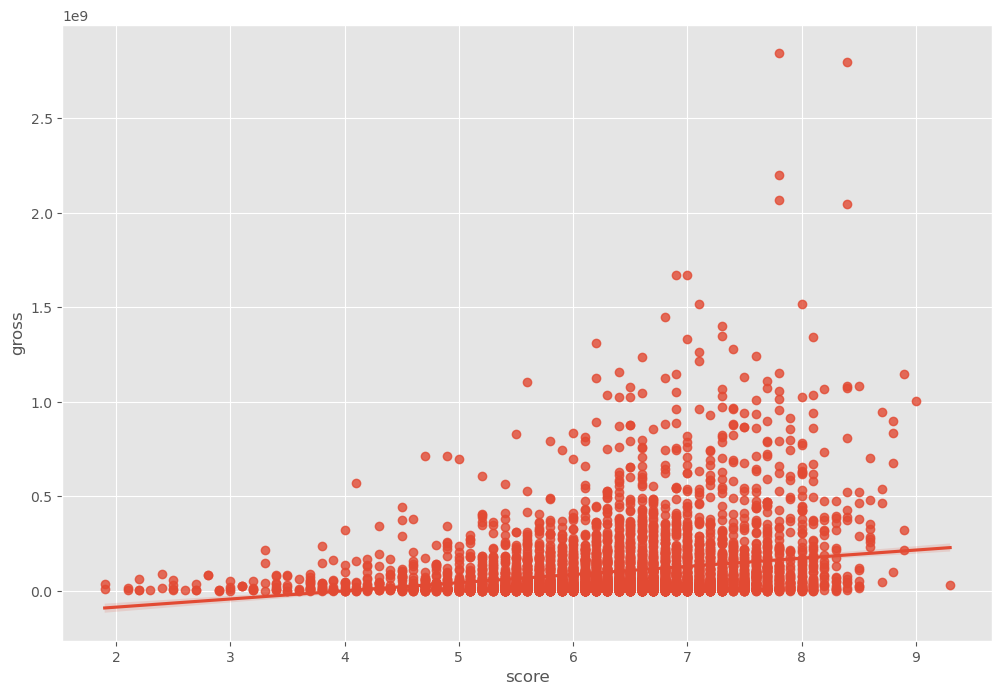

In [32]:
sns.regplot(x="score", y="gross", data=df)

In [33]:
# Correlation matrix

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [34]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.038391,0.295884,0.220991,0.239313,0.064106
score,0.038391,1.000000,0.350111,-0.006518,0.124715,0.292872
votes,0.295884,0.350111,1.000000,0.346228,0.553640,0.205616
budget,0.220991,-0.006518,0.346228,1.000000,0.512637,0.230879
gross,0.239313,0.124715,0.553640,0.512637,1.000000,0.176825
runtime,0.064106,0.292872,0.205616,0.230879,0.176825,1.000000


In [35]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056269,0.426571,0.313199,0.350679,0.094396
score,0.056269,1.000000,0.495379,-0.010133,0.182857,0.413040
votes,0.426571,0.495379,1.000000,0.493404,0.745815,0.300959
budget,0.313199,-0.010133,0.493404,1.000000,0.693670,0.330276
gross,0.350679,0.182857,0.745815,0.693670,1.000000,0.257121
runtime,0.094396,0.413040,0.300959,0.330276,0.257121,1.000000


Text(120.72222222222221, 0.5, 'Movie features')

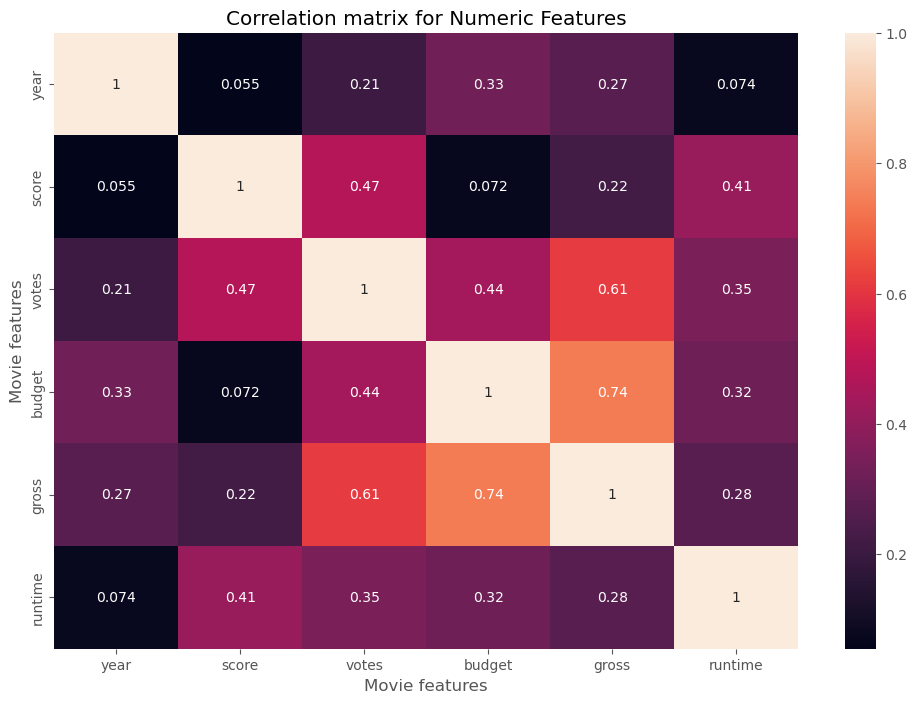

In [37]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

In [38]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.006035,0.118569,0.090947,0.659472,0.050557,0.645803,0.541648,0.694912,0.318605,-0.060774,0.598114,0.985994,0.134423,0.221881
rating,-0.006035,1.000000,0.198305,-0.030843,-0.015106,0.025976,-0.076402,0.064537,0.029742,0.084960,0.035732,-0.016784,-0.006548,0.111160,-0.085198
genre,0.118569,0.198305,1.000000,0.044024,0.082170,0.016181,0.106739,0.075893,0.106394,0.054372,0.062158,0.160869,0.118994,0.072187,0.101005
year,0.090947,-0.030843,0.044024,1.000000,0.098309,0.005345,0.059613,0.070650,0.069622,0.075603,0.008430,0.053454,0.091102,0.041835,0.032308
released,0.659472,-0.015106,0.082170,0.098309,1.000000,0.026573,0.407915,0.416891,0.487526,0.287794,-0.014712,0.397903,0.666985,0.134920,0.149112
score,0.050557,0.025976,0.016181,0.005345,0.026573,1.000000,0.114635,0.015416,0.036476,0.031175,0.052216,0.013039,0.055877,0.031773,0.065738
votes,0.645803,-0.076402,0.106739,0.059613,0.407915,0.114635,1.000000,0.271504,0.356045,0.111119,-0.026147,0.481900,0.657252,0.060651,0.254171
director,0.541648,0.064537,0.075893,0.070650,0.416891,0.015416,0.271504,1.000000,0.552213,0.319804,-0.015112,0.317742,0.547676,0.210498,0.006446
writer,0.694912,0.029742,0.106394,0.069622,0.487526,0.036476,0.356045,0.552213,1.000000,0.295055,-0.024481,0.400932,0.702296,0.158326,0.118935
star,0.318605,0.084960,0.054372,0.075603,0.287794,0.031175,0.111119,0.319804,0.295055,1.000000,0.029369,0.099525,0.317405,0.159905,-0.008148


Text(120.72222222222221, 0.5, 'Movie features')

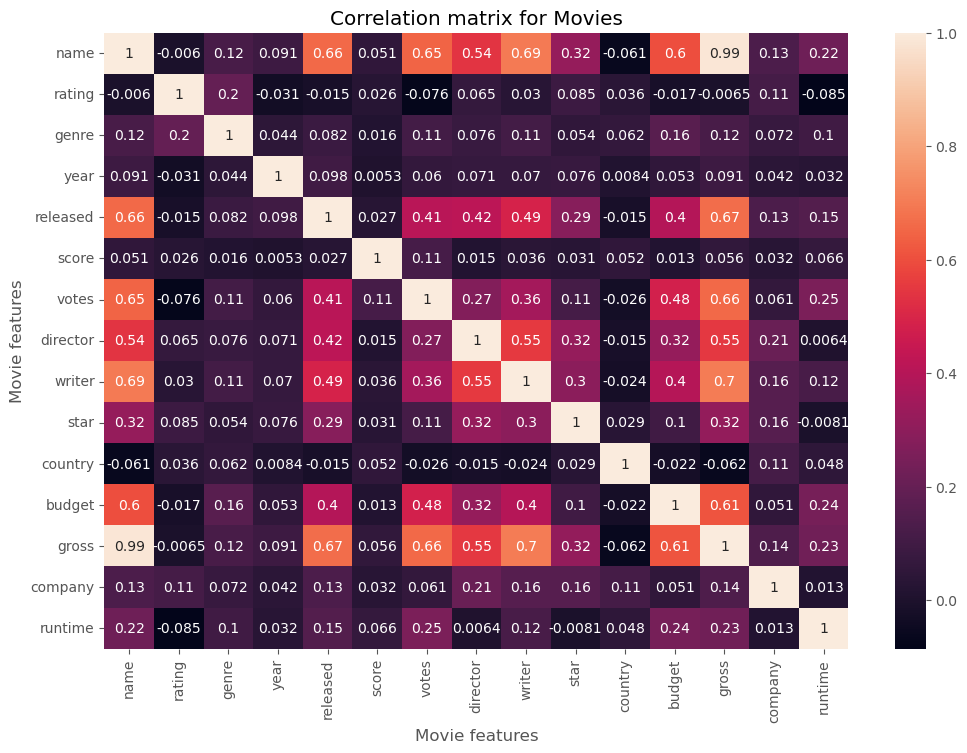

In [39]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")